<a href="https://colab.research.google.com/github/nnajeh/Attention/blob/main/ResNet_Attention_Map.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
#@title Simple visualization of ResNet-34 attention maps

In [47]:
from PIL import Image
import requests
import numpy as np
from io import BytesIO
import torch
from torch import nn
from torchvision.models import resnet50
from torchvision.models.resnet import ResNet, BasicBlock
import torchvision.transforms as T
import torch.nn.functional as F
%pylab inline

Populating the interactive namespace from numpy and matplotlib


In [ ]:
#@title Will use basic ResNet-50 from torch model:

In [48]:
from keras import applications

In [50]:
base_resnet50 = applications.ResNet50(weights='imagenet')

In [51]:
class ResNet50AT(ResNet):
    """Attention maps of ResNet-50.
    
    Overloaded ResNet model to return attention maps.
    """
    
    def forward(self, x):
        x = self.conv1(x)
        x = self.bn1(x)
        x = self.relu(x)
        x = self.maxpool(x)

        g0 = self.layer1(x)
        g1 = self.layer2(g0)
        g2 = self.layer3(g1)
        g3 = self.layer4(g2)
        
        return [g.pow(2).mean(1) for g in (g0, g1, g2, g3)]


In [52]:
from copy import deepcopy

In [53]:
import copy
d = { ... }
d2 = copy.deepcopy(d)

In [54]:

model = ResNet50AT(BasicBlock, [3, 4, 6, 3])
torch.save(model.state_dict(), 'model_state.pth')
device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")
#model.state_dict(base_resnet50.state_dict())
model.load_state_dict(copy.deepcopy(torch.load("model_state.pth",device)))


<All keys matched successfully>

In [38]:
#@title Load an image:

In [72]:
def load(url):
    response = requests.get(url)
    return np.ascontiguousarray(Image.open(BytesIO(response.content)), dtype=np.uint8)

In [117]:
image = load('https://cdn.mos.cms.futurecdn.net/VRv8ab66tAfezxvXdXVpfe-1024-80.jpg.webp')

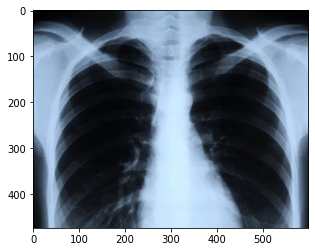

In [119]:
plt.imshow(image);

In [120]:
transform = T.Compose([   
    T.ToTensor(),
    T.ToPILImage(),
    T.Resize(256),
    T.CenterCrop(224),
    T.RandomHorizontalFlip(),
    T.Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225])
])

In [64]:
#@title Visualize attention maps for each group:




In [121]:
model.eval()

ResNet50AT(
  (conv1): Conv2d(3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)
  (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (relu): ReLU(inplace=True)
  (maxpool): MaxPool2d(kernel_size=3, stride=2, padding=1, dilation=1, ceil_mode=False)
  (layer1): Sequential(
    (0): BasicBlock(
      (conv1): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (relu): ReLU(inplace=True)
      (conv2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (bn2): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    )
    (1): BasicBlock(
      (conv1): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (relu): ReLU(inplace=True

In [123]:
with torch.no_grad():
    x = tr_center_crop(image).unsqueeze(0)
    gs = model(x)

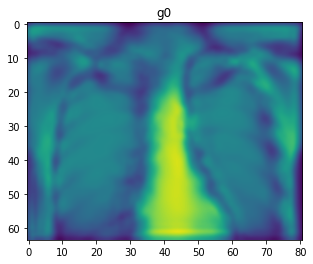

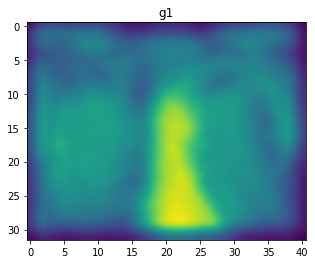

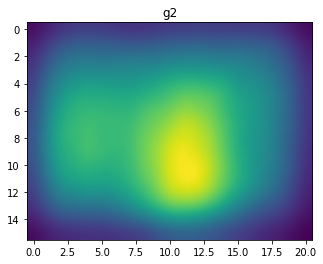

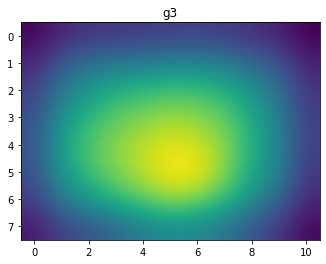

In [124]:
for i, g in enumerate(gs):
    plt.imshow(g[0], interpolation='bicubic')
    plt.title(f'g{i}')
    plt.show()